# Game of Thrones Twitter Analysis

This is the code for generating the plots for twitter character tweet counts.

In [1]:
import re
import string
import datetime

import numpy as np
import pandas as pd

from nltk.tokenize import TweetTokenizer

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

**Tweets that have either \#GOT \#GameofThrones or \#GOT8**

Scraped between `2019-04-14` and `2019-04-15`.

In [2]:
got = pd.read_csv('data/got_s8e2_full.csv')
got['created_at'] = pd.to_datetime(got['created_at'])
got.head()

,created_at,tweet_id,user,location,text,likes,retweets
0,2019-04-22 02:25:41,1120151660523925506,heskiemo,Blackpool,Be the Tormund to my Brienne of Tarth? 🥰 #Game...,0,0
1,2019-04-22 02:25:41,1120151660507074566,ArtisterysFunk,"Baltimore, MD",BRING IT ON!!! I thought that ther was on a 2 ...,0,0
2,2019-04-22 02:25:41,1120151660360167424,mmr04055,from the world's anus.,Beyoncé - Grown Woman (Bonus Video) https://t....,0,0
3,2019-04-22 02:25:41,1120151660288978944,Saltydawg,"Toronto, Canada, 5150",Fuck #GameofThrones I watch serious shows like...,0,0
4,2019-04-22 02:25:41,1120151659961827328,Faazzla,"Washington, DC","Lol at the google search jump for ""@Maisie_Wil...",0,0


In [3]:
print("Unique tweets:", got['tweet_id'].nunique())
got.describe().T

Unique tweets: 122323


,count,mean,std,min,25%,50%,75%,max
tweet_id,122439.0,1.120140e+18,8.718208e+12,1.120097e+18,1.120135e+18,1.120142e+18,1.120146e+18,1.120152e+18
likes,122439.0,7.398500e+00,1.905146e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.254600e+04
retweets,122439.0,1.868718e+00,5.645733e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.492800e+04


## Timeline data EDA

Aggregating the tweet count per second

In [4]:
got_count = pd.to_datetime(got['created_at']).value_counts().reset_index(name='tweets').set_index('index')
got_count.head()

,tweets
index,
2019-04-22 02:00:24,65
2019-04-22 02:00:31,61
2019-04-22 02:00:09,60
2019-04-22 02:02:21,58
2019-04-22 02:02:50,58


In [5]:
print("Tweet range from {} to {}".format(got_count.index.min(), got_count.index.max()))

Tweet range from 2019-04-21 22:49:33 to 2019-04-22 02:25:41


Re-aggregate tweet counts per minute and hour

In [6]:
got_by_minute = got_count.resample('T').sum()
got_by_hour = got_count.resample('H').sum()
got_by_minute.head()

,tweets
index,
2019-04-21 22:49:00,15
2019-04-21 22:50:00,37
2019-04-21 22:51:00,47
2019-04-21 22:52:00,41
2019-04-21 22:53:00,41


<AxesSubplot:xlabel='index'>

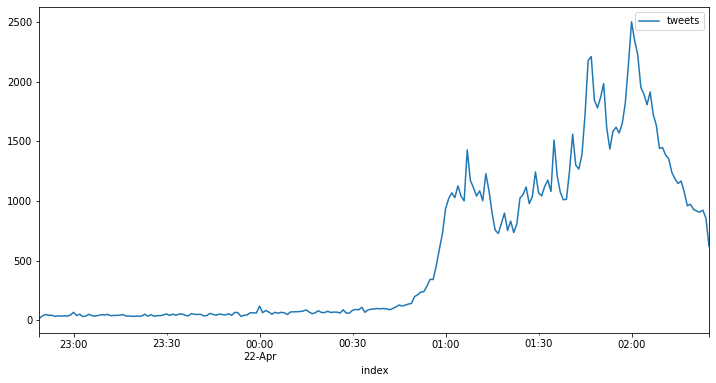

In [7]:
plt.rcParams['figure.figsize'] = (12, 6)
got_by_minute.plot()

In [8]:
got_by_hour.head()

,tweets
index,
2019-04-21 22:00:00,397
2019-04-21 23:00:00,2657
2019-04-22 00:00:00,7721
2019-04-22 01:00:00,75150
2019-04-22 02:00:00,36514


<AxesSubplot:xlabel='index'>

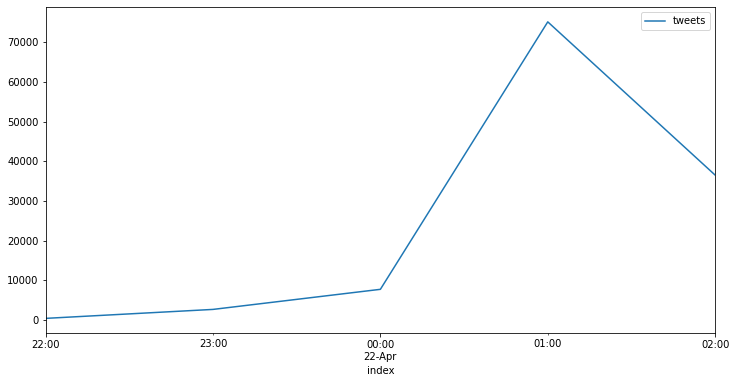

In [9]:
got_by_hour.plot()

## View tweets by minute during the premiere

show aired from 1AM UTC 

In [10]:
start_datetime = pd.Timestamp("2019-04-22 00:45")
end_datetime = pd.Timestamp("2019-04-22 02:15")
got_show = got_by_minute[(got_by_minute.index >= start_datetime) & (got_by_minute.index < end_datetime)]
got_show.head()

,tweets
index,
2019-04-22 00:45:00,127
2019-04-22 00:46:00,119
2019-04-22 00:47:00,126
2019-04-22 00:48:00,135
2019-04-22 00:49:00,140


In [11]:
got_show.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-04-22 00:45:00 to 2019-04-22 02:14:00
Freq: T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tweets  90 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


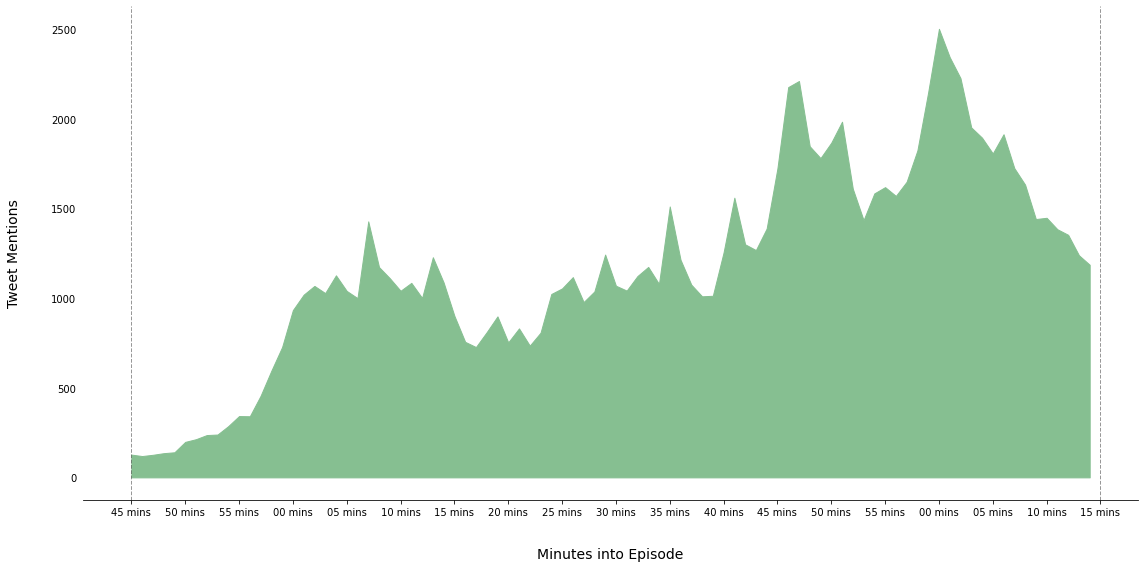

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
# ax.plot(got_show.index, got_show['tweets'], color='#86bf91')
ax.fill_between(got_show.index, got_show['tweets'], color='#86bf91')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

# ax.set_title('GOT Premiere Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/s08e02-all-tweets.png', dpi=300)
plt.tight_layout()
plt.show()

## Text Analysis for Main Characters

Important characters: #Sansa #Arya #Cersei #Bran #JonSnow #Daenerys #Tyrion #Jamie

### Get tweet counts for each character

only view tweets 15 mins before and after the show (Episode 1 was actually 54 mins long)

In [13]:
show_text = got[(got.created_at >= start_datetime) & (got.created_at < end_datetime)].reset_index(drop=True)
show_text.head()

,created_at,tweet_id,user,location,text,likes,retweets
0,2019-04-22 02:14:59,1120148968032407552,nicolekn83,United States,If y’all don’t stop asking why Jon and Danny a...,2,0
1,2019-04-22 02:14:59,1120148968007188480,rossmccall93,"Paisley, Scotland","Jon “it’s the truth dany, I wish it wasn’t”\r\...",0,0
2,2019-04-22 02:14:59,1120148967935836166,demigagnon,"Manitoba, Canada","If you’re wondering, yes I yelled with joy whe...",0,0
3,2019-04-22 02:14:59,1120148967851950082,noneofurbijness,NaN,Beautiful episode! #gameofthrones,0,0
4,2019-04-22 02:14:59,1120148967445209089,DystopianHero,"Chicago, IL","Out of all the characters, including the drago...",0,0


Tokenize the tweets and extract the words related to the different main characters

In [14]:
main_characters = ['jon', 'jonsnow', 'john', 'aegon', 'aegontargaryen', 'daenerys', 'daenerystargaryen', 'dany', 'dani', 'khaleesi', 'motherofdragons', 
                   'drogon', 'rhaegal', 'viserion', 'dragons', 'dragon',
                   'tyrion', 'tyrionlannister', 'cersei', 'cerseilannister', 'cersie', 'jamie', 'jaime', 'jaimelannister', 
                   'sansa', 'sansastark', 'arya', 'aryastark', 'bran', 'branstark', 'brandon', 
                   'sam', 'samwell', 'samwelltarly',  'bronn', 'bron', 'brienne', 'sandor', 'sandorclegane', 'hound', 'thehound',
                   'jorah', 'jorahmormont', 'lyanna', 'lyannamormont', 'ladymormont', 'umber', 'lordnedumbr', 'littlelordumber', 
                   'missandei', 'worm', 'greyworm', 'tormund', 'tormundgiantsbane', 'gendry',  'davos', 'serdavos', 'varys', 
                   'theon', 'theongreyjoy', 'yara', 'yaragreyjoy', 'euron', 'eurongreyjoy', 
                   'nightking', 'whitewalker','whitewalkers', 'walkers'] 

def tokenize_tweet_count(tweet):
    # Remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # Remove the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Remove the "'s'" form of the word
    tweet = re.sub(r'\'s', '', tweet)
    # Remove non-alphabet characters
    tweet = re.sub(r'[^a-zA-Z ]+', '', tweet)
    # Get all of the tokens in a set of tweets
    twt = TweetTokenizer(strip_handles=True, reduce_len=True)
    # filter out stop words and punctuation and send to lower case
    tokens = {token.lower() for token in twt.tokenize(tweet) if token.lower() in main_characters}
    
    return(' '.join(tokens))

tokenize_tweet_count("jon's house don't play! sansa jon sammmy")

'sansa jon'

create tokenized row,check to most popular characters overall

In [15]:
show_text['cleaned_text'] = show_text['text'].apply(tokenize_tweet_count)
dict(show_text['cleaned_text'].str.split(expand=True).stack().value_counts().head(50))

{'arya': 10860,
 'brienne': 8028,
 'tormund': 6052,
 'bran': 4265,
 'gendry': 3735,
 'jon': 3568,
 'jaime': 3558,
 'dany': 3531,
 'sansa': 3456,
 'jamie': 2335,
 'daenerys': 1834,
 'theon': 1801,
 'tyrion': 1386,
 'sam': 767,
 'walkers': 690,
 'aryastark': 674,
 'jorah': 577,
 'worm': 560,
 'missandei': 549,
 'cersei': 533,
 'lyanna': 488,
 'greyworm': 469,
 'dragon': 443,
 'aegon': 435,
 'dragons': 351,
 'hound': 345,
 'jonsnow': 302,
 'samwell': 293,
 'davos': 280,
 'nightking': 197,
 'jaimelannister': 189,
 'john': 188,
 'branstark': 187,
 'khaleesi': 152,
 'dani': 130,
 'daenerystargaryen': 107,
 'sansastark': 102,
 'whitewalkers': 79,
 'brandon': 67,
 'aegontargaryen': 49,
 'tyrionlannister': 45,
 'tormundgiantsbane': 42,
 'sandor': 41,
 'viserion': 36,
 'drogon': 34,
 'whitewalker': 29,
 'theongreyjoy': 29,
 'samwelltarly': 25,
 'motherofdragons': 25,
 'bronn': 25}

In [16]:
show_text.head(10)

,created_at,tweet_id,user,location,text,likes,retweets,cleaned_text
0,2019-04-22 02:14:59,1120148968032407552,nicolekn83,United States,If y’all don’t stop asking why Jon and Danny a...,2,0,jon
1,2019-04-22 02:14:59,1120148968007188480,rossmccall93,"Paisley, Scotland","Jon “it’s the truth dany, I wish it wasn’t”\r\...",0,0,jon dany
2,2019-04-22 02:14:59,1120148967935836166,demigagnon,"Manitoba, Canada","If you’re wondering, yes I yelled with joy whe...",0,0,gendry arya
3,2019-04-22 02:14:59,1120148967851950082,noneofurbijness,NaN,Beautiful episode! #gameofthrones,0,0,
4,2019-04-22 02:14:59,1120148967445209089,DystopianHero,"Chicago, IL","Out of all the characters, including the drago...",0,0,dragons gendry arya
5,2019-04-22 02:14:59,1120148967411585025,drummerdelaney,Los Angeles,Isn’t Arya still a child? I feel gross. #Gameo...,2,0,arya
6,2019-04-22 02:14:59,1120148967357145088,KatzAndrewS,"New York, USA","I feel like the Crypts of Winterfell (where, y...",2,0,
7,2019-04-22 02:14:59,1120148966870482945,weirwoodtreehug,Minneapolis,Bran to the Night King on the next #GameofThro...,1,0,bran
8,2019-04-22 02:14:59,1120148966430187521,hawaiizhonu3,NaN,Next week will be freaking epic #GameofThrones...,0,0,
9,2019-04-22 02:14:59,1120148966233059328,ragocat122,OT2017,"BRUH, THERE ALL GUNNA DIE , IM NOT READY FOR T...",0,0,


In [17]:
show_text[show_text.cleaned_text != ''].head(10)

,created_at,tweet_id,user,location,text,likes,retweets,cleaned_text
0,2019-04-22 02:14:59,1120148968032407552,nicolekn83,United States,If y’all don’t stop asking why Jon and Danny a...,2,0,jon
1,2019-04-22 02:14:59,1120148968007188480,rossmccall93,"Paisley, Scotland","Jon “it’s the truth dany, I wish it wasn’t”\r\...",0,0,jon dany
2,2019-04-22 02:14:59,1120148967935836166,demigagnon,"Manitoba, Canada","If you’re wondering, yes I yelled with joy whe...",0,0,gendry arya
4,2019-04-22 02:14:59,1120148967445209089,DystopianHero,"Chicago, IL","Out of all the characters, including the drago...",0,0,dragons gendry arya
5,2019-04-22 02:14:59,1120148967411585025,drummerdelaney,Los Angeles,Isn’t Arya still a child? I feel gross. #Gameo...,2,0,arya
7,2019-04-22 02:14:59,1120148966870482945,weirwoodtreehug,Minneapolis,Bran to the Night King on the next #GameofThro...,1,0,bran
10,2019-04-22 02:14:59,1120148965914103809,winteriscommin2,te,Tormun Brienne Arya #GameofThronesSeason8 #GO...,0,0,arya cerseilannister brienne aryastark jonsnow
12,2019-04-22 02:14:59,1120148965041889280,gabysreputation,"Laredo, TX",MY GIRL ARYA GOT IT #GameofThrones https://t.c...,0,0,arya
13,2019-04-22 02:14:59,1120148964966326272,karisnkrismom,Where God wants me to be,Jon looked disappointed that Danys first thoug...,0,0,jon
14,2019-04-22 02:14:59,1120148964911865861,EssenceofJewels,"Baltimore, MD",The Arya scene was too much for me to handle. ...,0,0,arya


filter tweets which contain any character mentions

In [18]:
show_text_main = show_text.loc[show_text.cleaned_text != '', ['created_at', 'text', 'cleaned_text']].reset_index(drop=True)
show_text_main.head(20)

,created_at,text,cleaned_text
0,2019-04-22 02:14:59,If y’all don’t stop asking why Jon and Danny a...,jon
1,2019-04-22 02:14:59,"Jon “it’s the truth dany, I wish it wasn’t”\r\...",jon dany
2,2019-04-22 02:14:59,"If you’re wondering, yes I yelled with joy whe...",gendry arya
3,2019-04-22 02:14:59,"Out of all the characters, including the drago...",dragons gendry arya
4,2019-04-22 02:14:59,Isn’t Arya still a child? I feel gross. #Gameo...,arya
5,2019-04-22 02:14:59,Bran to the Night King on the next #GameofThro...,bran
6,2019-04-22 02:14:59,Tormun Brienne Arya #GameofThronesSeason8 #GO...,arya cerseilannister brienne aryastark jonsnow
7,2019-04-22 02:14:59,MY GIRL ARYA GOT IT #GameofThrones https://t.c...,arya
8,2019-04-22 02:14:59,Jon looked disappointed that Danys first thoug...,jon
9,2019-04-22 02:14:59,The Arya scene was too much for me to handle. ...,arya


Create counts for each character of interest (change this per episode as needed). This allows text 'jon' & 'jonsnow' to be counted twice on the same tweet, but allowing that for now

In [19]:
show_text_main['jon_count'] = np.where(show_text_main.cleaned_text.str.contains('jon|john|jonsnow'), 1, 0)
show_text_main['aegon_count'] = np.where(show_text_main.cleaned_text.str.contains('aegon|aegontargaryen'), 1, 0)
show_text_main['dany_count'] = np.where(show_text_main.cleaned_text.str.contains('daenerys|daenerystargaryen|dany|dany|khaleesi|motherofdragons'), 1, 0)
show_text_main['dragon_count'] = np.where(show_text_main.cleaned_text.str.contains('drogon|rhaegal|viserion|dragons|dragon'), 1, 0)
show_text_main['cersei_count'] = np.where(show_text_main.cleaned_text.str.contains('cersei|cersie|cerseilannister'), 1, 0)
show_text_main['jaime_count'] = np.where(show_text_main.cleaned_text.str.contains('jamie|jaime|jaimelannister'), 1, 0)
show_text_main['tyrion_count'] = np.where(show_text_main.cleaned_text.str.contains('tyrion|tyrionlannister'), 1, 0)
show_text_main['bran_count'] = np.where(show_text_main.cleaned_text.str.contains('bran|brandon|branstark'), 1, 0)
show_text_main['brienne_count'] = np.where(show_text_main.cleaned_text.str.contains('brienne'), 1, 0)
show_text_main['arya_count'] = np.where(show_text_main.cleaned_text.str.contains('arya|aryastark'), 1, 0)
show_text_main['sansa_count'] = np.where(show_text_main.cleaned_text.str.contains('sansa|sansastark'), 1, 0)
show_text_main['sam_count'] = np.where(show_text_main.cleaned_text.str.contains('sam|samwell|samtarly|samwelltarly'), 1, 0)
show_text_main['gendry_count'] = np.where(show_text_main.cleaned_text.str.contains('gendry'), 1, 0)
show_text_main['hound_count'] = np.where(show_text_main.cleaned_text.str.contains('hound|thehound|sandor|sandorclegane'), 1, 0)
show_text_main['theon_count'] = np.where(show_text_main.cleaned_text.str.contains('theon|theongreyjoy'), 1, 0)
show_text_main['yara_count'] = np.where(show_text_main.cleaned_text.str.contains('yara|yaragreyjoy'), 1, 0)
show_text_main['euron_count'] = np.where(show_text_main.cleaned_text.str.contains('euron|eurongreyjoy'), 1, 0)
show_text_main['tormund_count'] = np.where(show_text_main.cleaned_text.str.contains('tormund|tormundgiantsbane'), 1, 0)
show_text_main['umber_count'] = np.where(show_text_main.cleaned_text.str.contains('umber|nedumber|lordnedumber|littlelordumber'), 1, 0)
show_text_main['bronn_count'] = np.where(show_text_main.cleaned_text.str.contains('bronn|bron'), 1, 0)
show_text_main['davos_count'] = np.where(show_text_main.cleaned_text.str.contains('davos'), 1, 0)
show_text_main['whitewalker_count'] = np.where(show_text_main.cleaned_text.str.contains('nightking|whitewalker|whitewalkers|walkers'), 1, 0)

show_text_main['jon_count'].sum(), show_text_main['dany_count'].sum(), show_text_main['bran_count'].sum(), show_text_main['jaime_count'].sum(), show_text_main['tyrion_count'].sum()

(4019, 5583, 4458, 6040, 1419)

re-aggregate by tweet count per minute

In [20]:
show_text_main_minute = show_text_main.set_index('created_at').resample('T').sum()
show_text_main_minute.head()

,jon_count,aegon_count,dany_count,dragon_count,cersei_count,jaime_count,tyrion_count,bran_count,brienne_count,arya_count,...,gendry_count,hound_count,theon_count,yara_count,euron_count,tormund_count,umber_count,bronn_count,davos_count,whitewalker_count
created_at,,,,,,,,,,,,,,,,,,,,,
2019-04-22 00:45:00,4,0,7,3,1,2,2,5,0,3,...,2,1,0,0,0,0,1,0,0,2
2019-04-22 00:46:00,5,0,8,5,0,1,0,4,2,5,...,3,0,1,0,0,0,0,0,0,3
2019-04-22 00:47:00,0,0,3,2,2,4,0,3,1,3,...,1,2,1,0,0,3,1,0,0,6
2019-04-22 00:48:00,5,1,4,3,1,1,1,2,1,6,...,1,0,0,0,0,1,1,0,0,1
2019-04-22 00:49:00,6,1,7,2,2,5,1,6,2,3,...,1,0,0,0,0,0,2,0,0,5


## Plots

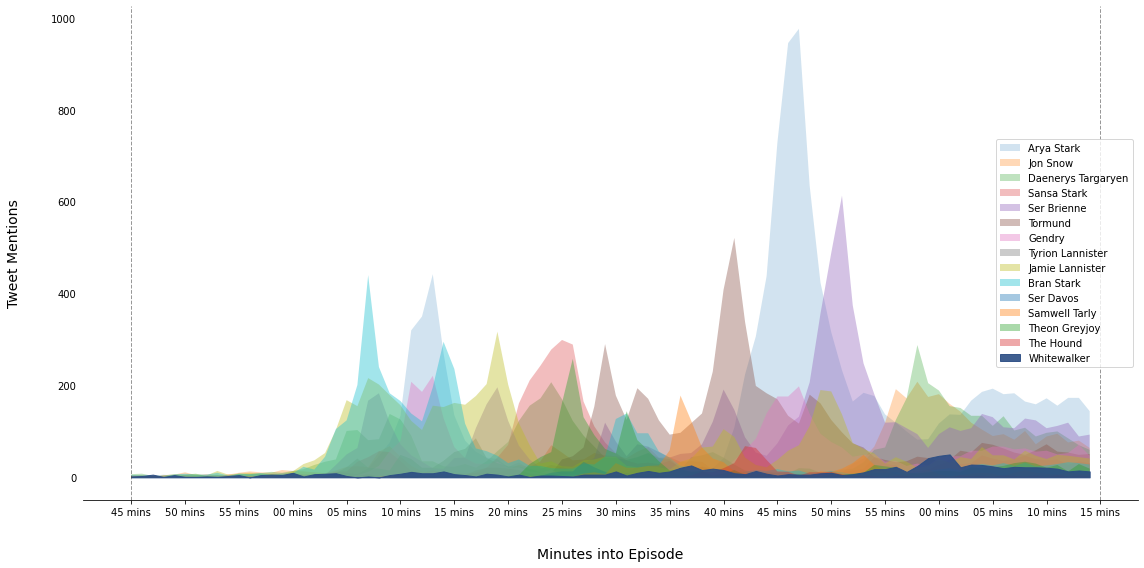

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['arya_count'], alpha=0.2, label='Arya Stark')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['jon_count'], alpha=0.3, label='Jon Snow')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['dany_count'], alpha=0.3, label='Daenerys Targaryen')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['sansa_count'], alpha=0.3, label='Sansa Stark')

ax.fill_between(show_text_main_minute.index, show_text_main_minute['brienne_count'], alpha=0.4, label='Ser Brienne')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['tormund_count'], alpha=0.4, label='Tormund')

ax.fill_between(show_text_main_minute.index, show_text_main_minute['gendry_count'], alpha=0.4, label='Gendry')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['tyrion_count'], alpha=0.4, label='Tyrion Lannister')

ax.fill_between(show_text_main_minute.index, show_text_main_minute['jaime_count'], alpha=0.4, label='Jamie Lannister')

ax.fill_between(show_text_main_minute.index, show_text_main_minute['bran_count'], alpha=0.4, label='Bran Stark')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['davos_count'], alpha=0.4, label='Ser Davos')

ax.fill_between(show_text_main_minute.index, show_text_main_minute['sam_count'], alpha=0.4, label='Samwell Tarly')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['theon_count'], alpha=0.4, label='Theon Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['hound_count'], alpha=0.4, label='The Hound')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['whitewalker_count'], alpha=0.9, label='Whitewalker', color="#2b4d84")


ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/s08e02_all.png', dpi=300)
plt.tight_layout()
plt.show()

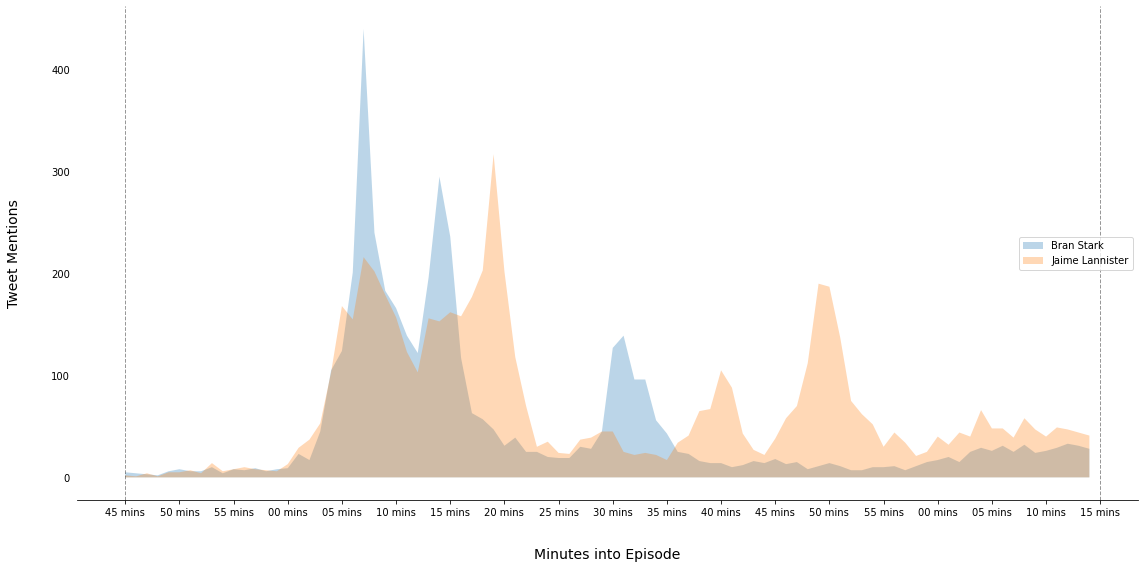

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['bran_count'], alpha=0.3, label='Bran Stark')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['jaime_count'], alpha=0.3, label='Jaime Lannister')
# ax.fill_between(show_text_main_minute.index, show_text_main_minute['tyrion_count'], alpha=0.3, label='Tyrion Lannister')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/02_bran.png', dpi=300)
plt.tight_layout()
plt.show()

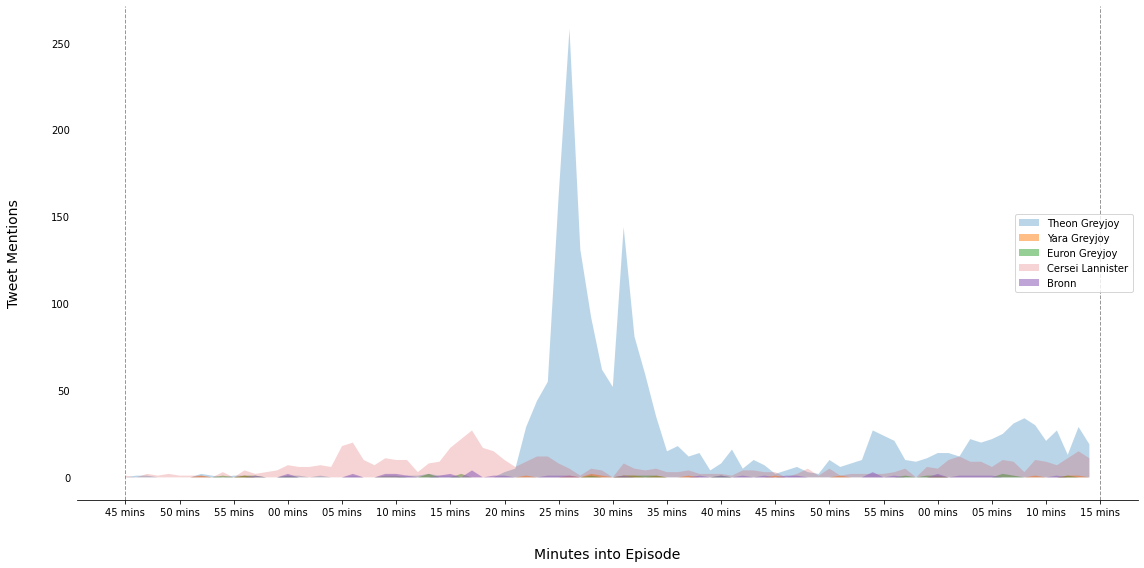

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['theon_count'], alpha=0.3, label='Theon Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['yara_count'], alpha=0.5, label='Yara Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['euron_count'], alpha=0.5, label='Euron Greyjoy')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['cersei_count'], alpha=0.2, label='Cersei Lannister')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['bronn_count'], alpha=0.6, label='Bronn')


ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/03_cersei.png', dpi=300)
plt.tight_layout()
plt.show()

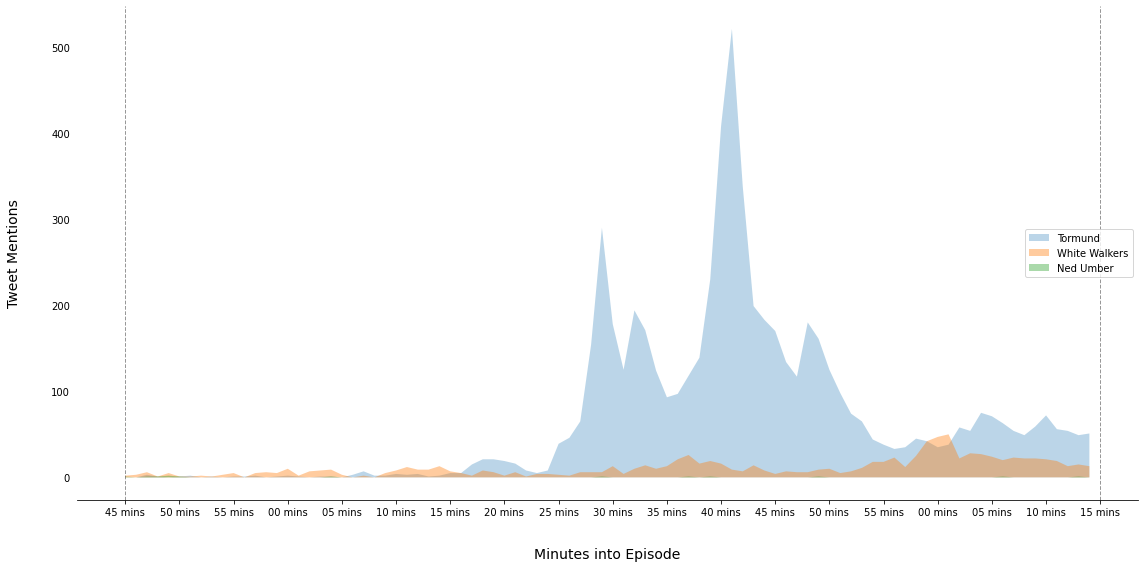

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['tormund_count'], alpha=0.3, label='Tormund')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['whitewalker_count'], alpha=0.4, label='White Walkers')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['umber_count'], alpha=0.4, label='Ned Umber')


ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/04_walkers.png', dpi=300)
plt.tight_layout()
plt.show()

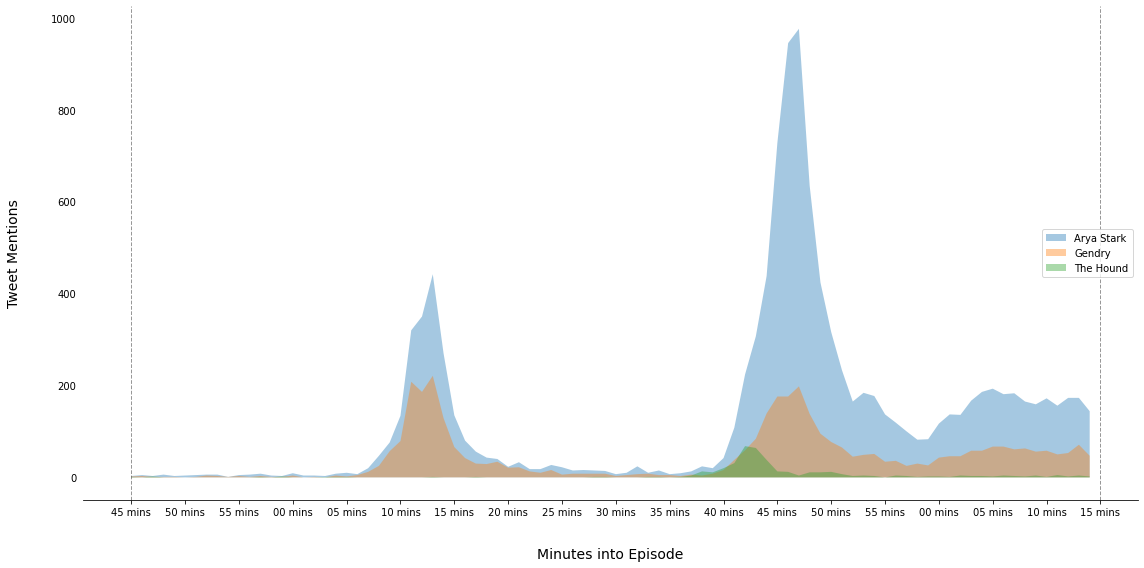

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['arya_count'], alpha=0.4, label='Arya Stark')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['gendry_count'], alpha=0.4, label='Gendry')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['hound_count'], alpha=0.4, label='The Hound')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/05_arya.png', dpi=300)
plt.tight_layout()
plt.show()

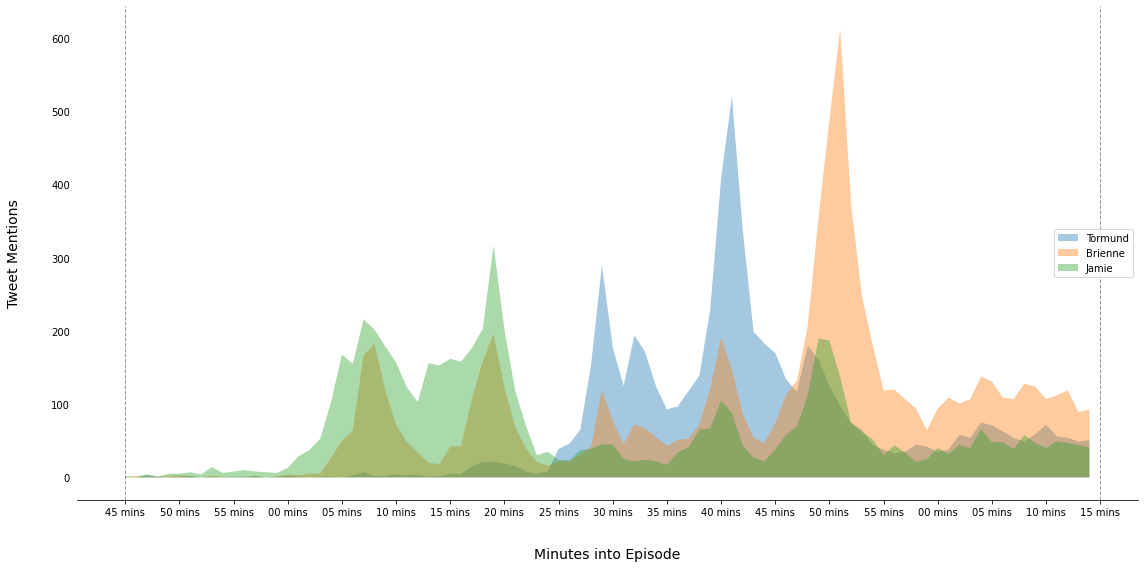

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.fill_between(show_text_main_minute.index, show_text_main_minute['tormund_count'], alpha=0.4, label='Tormund')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['brienne_count'], alpha=0.4, label='Brienne')
ax.fill_between(show_text_main_minute.index, show_text_main_minute['jaime_count'], alpha=0.4, label='Jamie')

ax.grid(False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)

ax.axvline(x=start_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)
ax.axvline(x=end_datetime, linestyle='--', linewidth=1, alpha=0.5, color='#333333', zorder=2)

ax.set_xlabel("Minutes into Episode", labelpad=30, weight='normal', size=14)
ax.set_ylabel("Tweet Mentions", labelpad=30, weight='normal', size=14)

ax.tick_params(axis='x', rotation=0)

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MinuteLocator([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M mins'))

ax.legend(loc='center right')
# ax.set_title('GOT Character Twitter Buzz', pad=25, weight='normal', size=24)

plt.savefig('images/05_arya.png', dpi=300)
plt.tight_layout()
plt.show()